##***Blinkit Sales Project***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##***Sample Data Loading of blinkit sales Project***

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/python Learning_PW/Python projects/blinkit_data.csv")

##***showing first 10 entries for the sample***

In [ ]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


##***showing last 05 entries for the sample***

In [ ]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


##***checking the row and columns numbers in the data***

In [ ]:
print("Size of the Table (Rows & Columns): ",df.shape)

Size of the Table (Rows & Columns):  (8523, 12)


##***print the columns names of the data***

In [ ]:
print("Column Names: ",df.columns)

Column Names:  Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


#`Data Cleaning`

##***Checking the Unique values in "Item Fat Content" Column***

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

##***Replacing the Unique values in "Item Fat Content" Column***

In [ ]:
df['Item Fat Content']=df['Item Fat Content'].replace({"low fat":"Low Fat",
                                                       "LF":"Low Fat",
                                                       "reg":"Regular"})

##***Checking the Unique values in "Item Fat Content" Column after replaced the Values***

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

##***BUSINESS REQUIREMENTS***

##***KPI's REQUIREMENTS***

In [ ]:
# Total Sales
Total_Sales=df['Sales'].sum()

# Average Sales
Avg_Sales=df['Sales'].mean()

# Total Count of Items
No_item_sold=df['Sales'].count()

# Average Rating
Avg_ratings=df['Rating'].mean()

# Solution
print(f"Total Sales: ${Total_Sales:,.1f}")
print(f"Average Sales: ${Avg_Sales:,.1f}")
print(f"Total Count of Items: {No_item_sold:,.0f}")
print(f"Average Rating: {Avg_ratings:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
Total Count of Items: 8,523
Average Rating: 4.0


##***CHARTS REQUIREMENTS***

##***Total Sales by Fat Content***

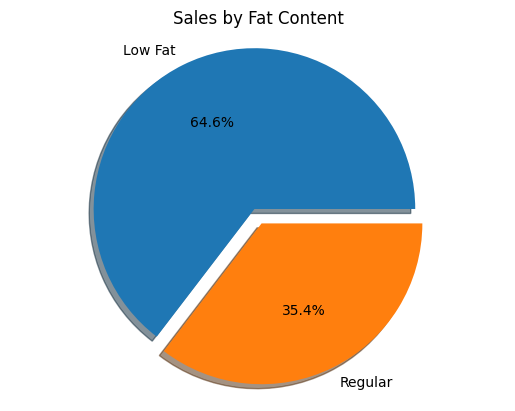

In [ ]:
Sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
Sales_by_fat
explode=(0.1,0)
plt.pie(Sales_by_fat,labels=Sales_by_fat.index,autopct='%1.1f%%',explode=explode,shadow=True)
plt.title("Sales by Fat Content")
plt.axis("equal")
plt.show()

##***Total Sales by Item Type***


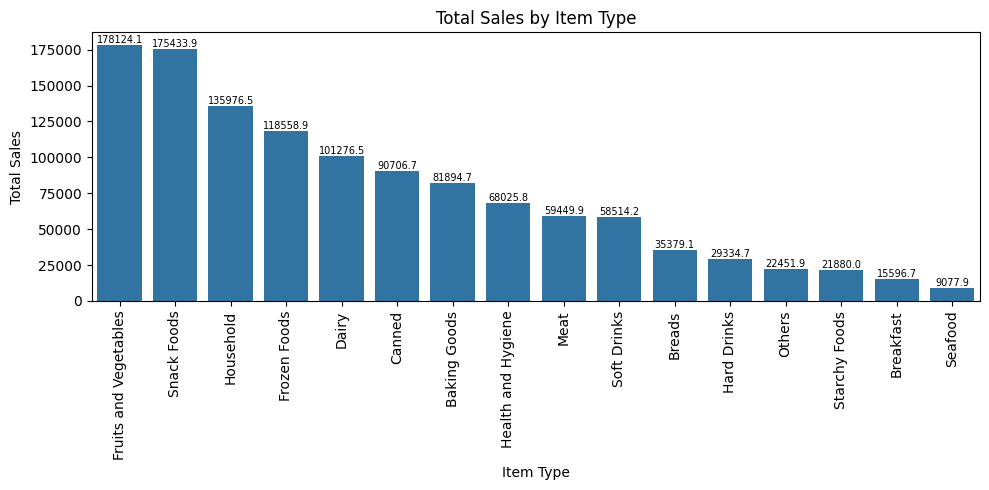

In [ ]:
Sales_by_item=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
Sales_by_item
plt.figure(figsize=(10,5))
ax = sns.barplot(x=Sales_by_item.index,y=Sales_by_item.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")

for bar in ax.patches:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():.1f}', ha='center', va='bottom',fontsize=7)

plt.tight_layout()
plt.show()


##***Fat Content by Outlet for Total Sales***


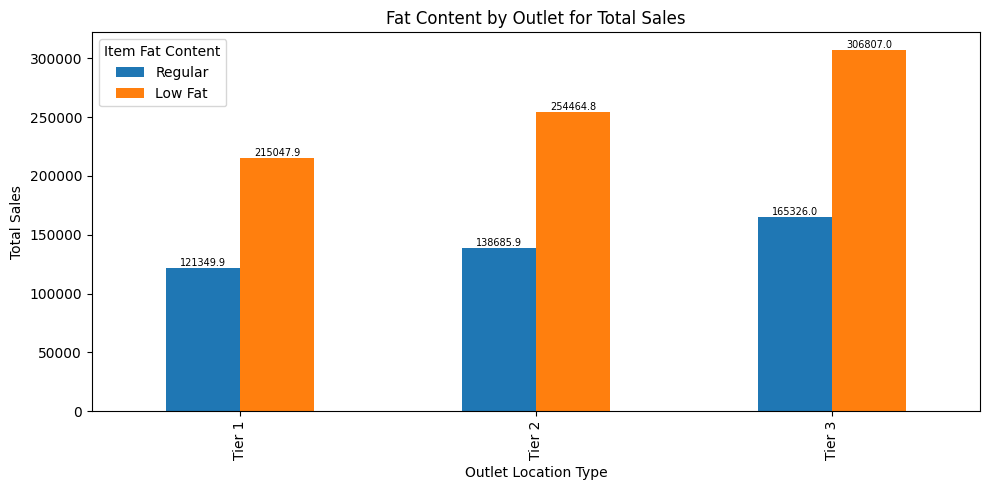

In [ ]:
Grouped=df.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
Grouped=Grouped[["Regular","Low Fat"]]

ax=Grouped.plot(kind="bar",figsize=(10,5))
plt.title("Fat Content by Outlet for Total Sales")
plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")

for bar in ax.patches:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():.1f}', ha='center', va='bottom',fontsize=7)
plt.tight_layout()
plt.show()

##***Total Sales by Outlet Establishment***

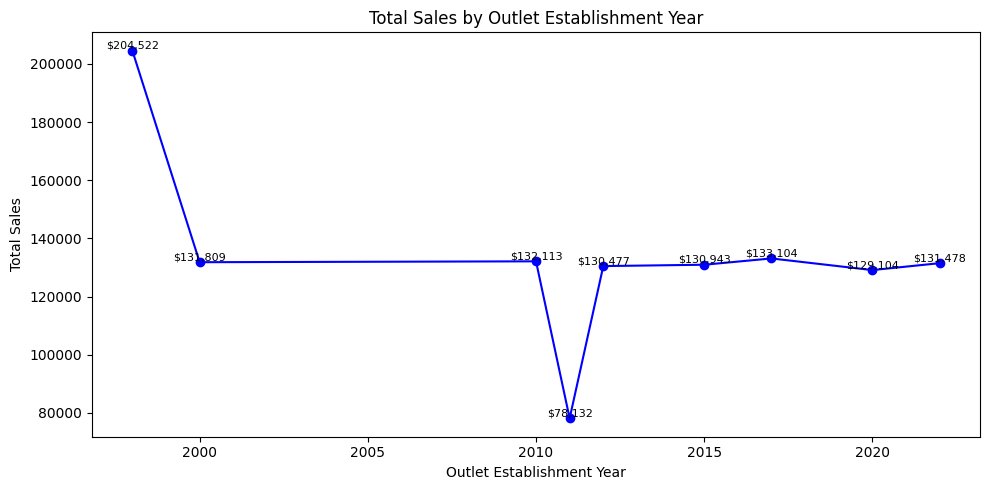

In [ ]:
sales_by_year=df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
sales_by_year
plt.figure(figsize=(10,5))
ax = plt.plot(sales_by_year.index,sales_by_year.values,marker="o",linestyle="-",color="b")
plt.xticks(rotation=0)
plt.title("Total Sales by Outlet Establishment Year")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")

for x,y in zip(sales_by_year.index,sales_by_year.values):
  plt.text(x,y,f"${y:,.0f}",ha="center",va="bottom",fontsize=8)
plt.tight_layout()
plt.show()

##***Sales by Outlet Size***

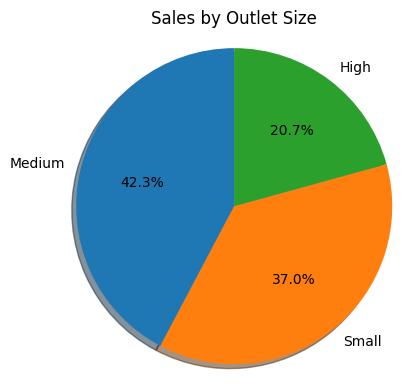

In [ ]:
sales_by_size=df.groupby("Outlet Size")["Sales"].sum().sort_values(ascending=False)
sales_by_size
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.axis("equal")
plt.show()

##***Sales by Outlet Location***

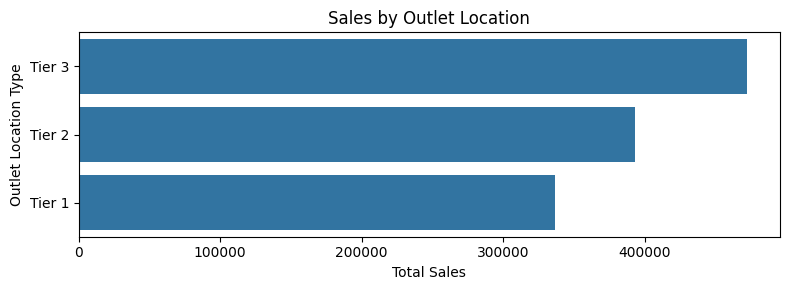

In [ ]:
Sales_by_location=df.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,3))
ax = sns.barplot(x="Sales",y="Outlet Location Type",data=Sales_by_location)
plt.xticks(rotation=0)
plt.title("Sales by Outlet Location")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")
plt.tight_layout()
plt.show()